## 1. Raw data

In [13]:
import pandas as pd

data_gender_submission = pd.read_csv("../data/gender_submission.csv")
print(f"\n[ gender_submission ]\n{data_gender_submission.head(2)}")

data_train = pd.read_csv("../data/train.csv")
print(f"\n[ train ]\n{data_train.head(2)}")

data_test = pd.read_csv("../data/test.csv")
print(f"\n[ test ]\n{data_test.head(2)}")


[ gender_submission ]
   PassengerId  Survived
0          892         0
1          893         1

[ train ]
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   

   Parch     Ticket     Fare Cabin Embarked  
0      0  A/5 21171   7.2500   NaN        S  
1      0   PC 17599  71.2833   C85        C  

[ test ]
   PassengerId  Pclass                              Name     Sex   Age  SibSp  \
0          892       3                  Kelly, Mr. James    male  34.5      0   
1          893       3  Wilkes, Mrs. James (Ellen Needs)  female  47.0      1   

   Parch  Ticket    Fare Cabin Embarked  
0      0  330911  7.8292   NaN        Q  
1      0  363272  7.0000   NaN        S  


## 2. Profiling

In [37]:
import matplotlib.pyplot as plt
import pandas as pd
import ydata_profiling

data_gender_submission = pd.read_csv("../data/gender_submission.csv")
data_train = pd.read_csv("../data/train.csv")
pr = data_train.profile_report()
pr.to_file("data_train_report.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### 1) 변수 분석
- PassengerId
    - 승객 번호
    - ex) 892, 893
- survival
    - 살아 남았는지 여부
    - [0, 1]
- Name
    - 승객 이름
- pclass
    - 사회 경제적 지위를 대신하여 나타내는 class
    - [1, 2, 3]
- age
    - 나이
    - 유리수 (1보다 작을 경우 x.5 의 형태)
- sibsp
    - 가족관계를 정의한 수치
    - 배우자에서 내연녀들과 약혼자는 무시된다
    - 형제수 / 배우자수(남편, 아내)
- parch
    - 가족관계를 정의한 수치
    - 부모수(부, 모) / 자녀수(아들, 딸)
    - 보모와 여행온 아이들의 경우에 0
- sex
    - 성별
    - [male, female]
- ticket
    - 티켓 번호 / 다양한 형식의 티켓 번호가 존재
    - [A/5 21171, 113803...]
- fare
    - 승객의 요금
- cabin
    - 객실 번호
    - [C85, C123...]
- embarked
    - 승선지
    - [S, C, Q]
    - S = Southampton, C = Cherbourg, Q = Queenstown

### 2) 상관관계 분석

/var/folders/mw/k_rydbt555l0d4t5g9pbrzrw0000gn/T/ipykernel_2434/3342197495.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_pclass.set_xticklabels(["1st", "2nd", "3rd"], fontsize=12)


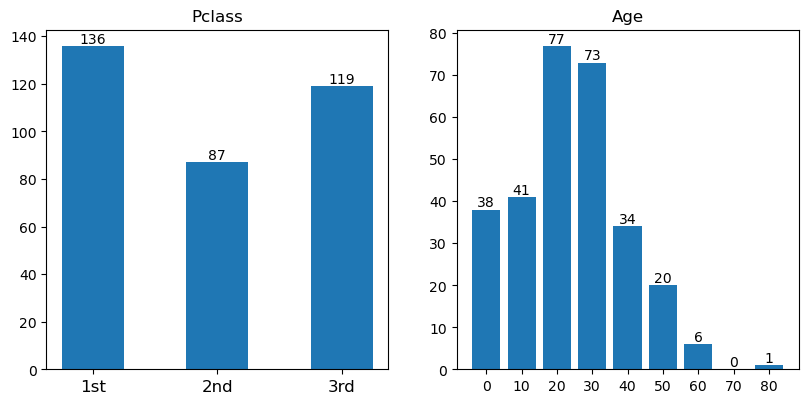

In [57]:
import matplotlib.pylab as plt
import pandas as pd
import numpy as np

fig = plt.figure(figsize=(15, 15))

data_train = pd.read_csv("../data/train.csv")
len_data_train_features = data_train.columns.size

target_name = "Survived"
survived = data_train[target_name]

# Pclass
feat_name_pclass = "Pclass"
feat_pclass = data_train[feat_name_pclass].unique()
feat_pclass.sort()
ax_pclass = fig.add_subplot(3, 3, 1)
ax_pclass.set_title(feat_name_pclass)
ax_pclass.set_xticklabels(["1st", "2nd", "3rd"], fontsize=12)
sum_targets = "sum_targets"
named_group = data_train.groupby(feat_name_pclass).agg(**{sum_targets: (target_name, "sum")}).reset_index()
ax_pclass.bar(feat_pclass, named_group[sum_targets], width=0.5)
ax_pclass.set_xticks(feat_pclass)
for idx, pclass in enumerate(named_group[feat_name_pclass]):
    ax_pclass.annotate(text=named_group[sum_targets][idx],
                xy=(pclass, named_group[sum_targets][idx]),
                ha="center",
                va="bottom")

# Age
feat_name_age = "Age"
grouped_age = data_train[feat_name_age].apply(lambda age: age // 10)
concated_age_survived = pd.concat([survived, grouped_age], axis="columns", keys=[target_name, feat_name_age])
age_group_count = concated_age_survived.groupby("Age").sum().reset_index()
ax_age = fig.add_subplot(3, 3, 2)
ax_age.bar(age_group_count[feat_name_age], age_group_count[target_name])
ax_age.set_title(feat_name_age)
ax_age.set_xticks(age_group_count[feat_name_age])
ax_age.set_xticklabels((age_group_count[feat_name_age] * 10).apply(int))
for idx, age in enumerate(age_group_count[feat_name_age]):
    ax_age.annotate(text=age_group_count[target_name][idx],
                    xy=(age, age_group_count[target_name][idx]),
                    ha="center",
                    va="bottom")

plt.show()